[-8.71336 -8.44843 -8.26633 ... -7.65709 -7.67762 -7.75783]
Fit with a*e^(-b*x)+c
a = 0.8339047575480008 ; error =  0.0002625885287946104
b = 0.09356377493854076 ; error =  8.687611671689187e-06
c = 0.029898092005241943 ; error =  7.838157763698564e-06


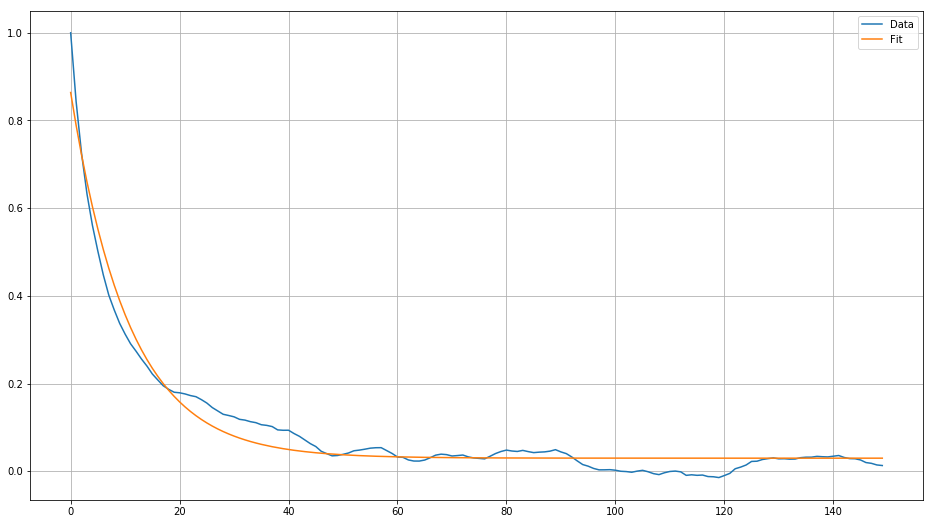

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

def AutoC(f, t):
    x=0.
    x_t=0.
    x_2=0.
    xx_t=0.
    j = len(f)-t
    for i in range(j):
        x+=f[i]
        x_t+=f[i+t]
        x_2+=f[i]**2
        xx_t+=f[i]*f[i+t]
    xx_t/=j
    x/=j
    x_2/=j
    x_t/=j
    return (xx_t-x_t*x)/(x_2-x**2)

def expo(x,a,b,c):
    return a*np.exp(-b*x)+c

plt.rcParams['figure.figsize'] = [16,9]

#Energy Autocorellation
k=np.loadtxt("MonteCarlo_NVT/e_inst_s.dat")

print(k)
ac=[]

n=150

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoC(k,i))
plt.plot(x,ac,label="Data")

param, pvar = opt.curve_fit(expo,x,ac)

plt.plot(x, expo(x, *param), label="Fit");

print("Fit with a*e^(-b*x)+c")
print("a =", param[0], "; error = ", pvar[0][0])
print("b =", param[1], "; error = ", pvar[1][1])
print("c =", param[2], "; error = ", pvar[2][2])


plt.legend()
plt.grid(1)

plt.show()

# L'errore non viene, le medio però sono giuste, WTF??????

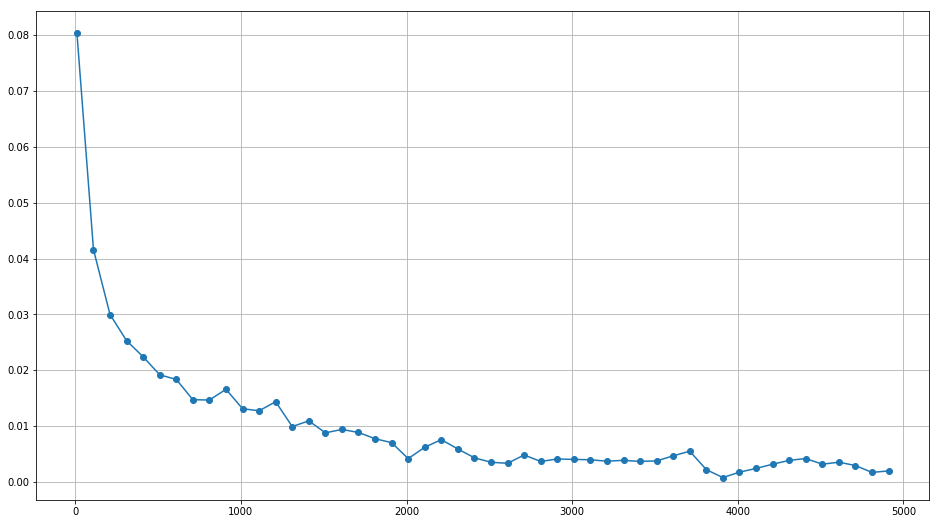

In [19]:
#Data blocking
M=len(k)
L=np.arange(10,5000,100)
ind = 0
Error = np.zeros(len(L))
for block_size in L:
    block_number = int(M/block_size)
    ave = np.zeros(block_number)
    error = np.zeros(block_number)
    for iblock in range(block_number):
        for istep in range(block_size+1):
            ave[iblock]+=k[iblock*block_size+istep]
        ave[iblock]/=block_size
    for i in range(block_number):
        global_ave = 0.
        global_ave_2 = 0.
        for j in range(i+1):
            global_ave += ave[j]
            global_ave_2 += ave[j]**2
        global_ave /=(i+1)
        global_ave_2 /=(i+1)
        error = ((global_ave_2-global_ave**2))**0.5
    Error[ind]=error
    ind+=1
    
plt.plot(L,Error, marker="o")
plt.grid(1)
plt.show()

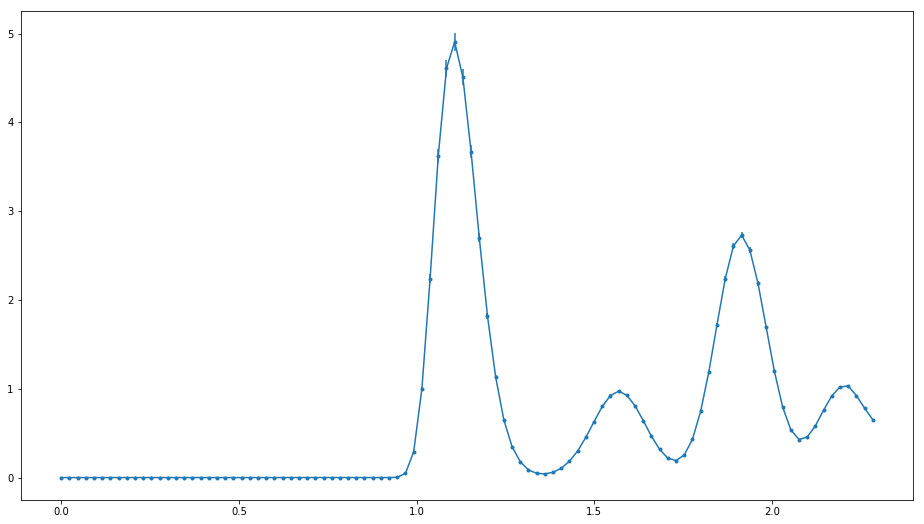

In [11]:
k=np.loadtxt("MonteCarlo_NVT/output.gave.0s")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".")
plt.show()

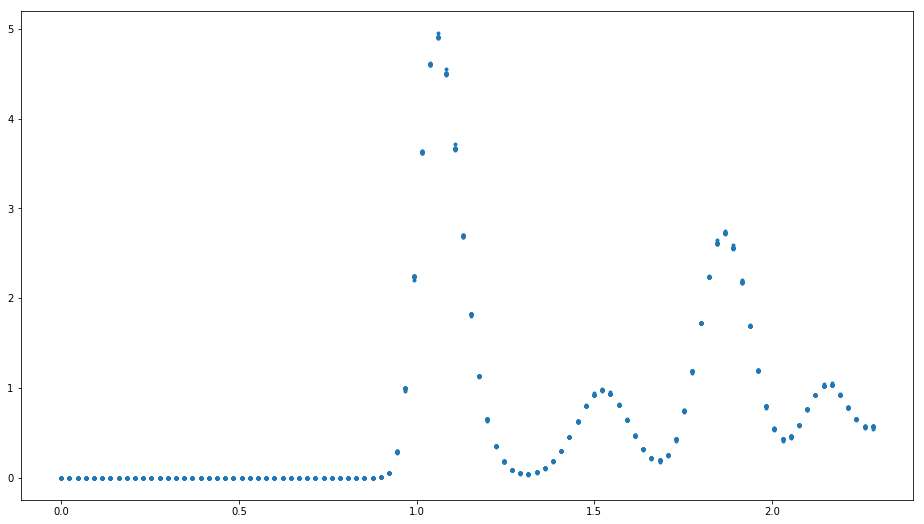

In [5]:
k=np.loadtxt("MonteCarlo_NVT/output.gofr.0s")
x=k[:,1]
y=k[:,2]

plt.plot(x,y,linestyle="none", marker=".")
plt.show()

In [5]:
k=np.loadtxt("MolDyn/output.gofr.0", unpack=True)
#print(k)
#x=k[:,1]
#y=k[:,2]
k
#plt.plot(x,y,linestyle="none", marker=".")
#plt.show()

array([[0.129266, 0.193899, 0.258532, ..., 6.39867 , 6.4633  , 6.52794 ],
       [0.      , 0.      , 0.      , ..., 0.863325, 0.975921, 0.85083 ]])

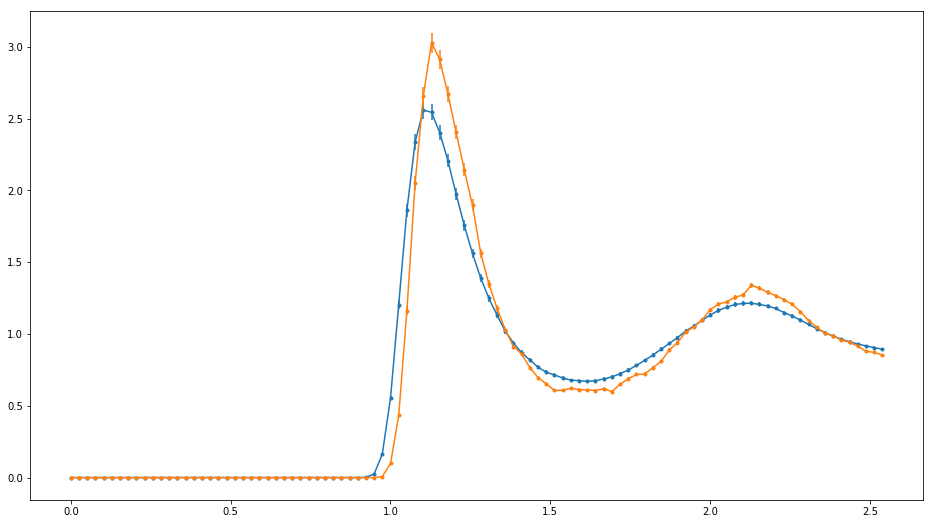

In [38]:
k=np.loadtxt("MonteCarlo_NVT/output.gave.0l")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".")

k=np.loadtxt("MolDyn/output.gave.0l")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".")
plt.show()

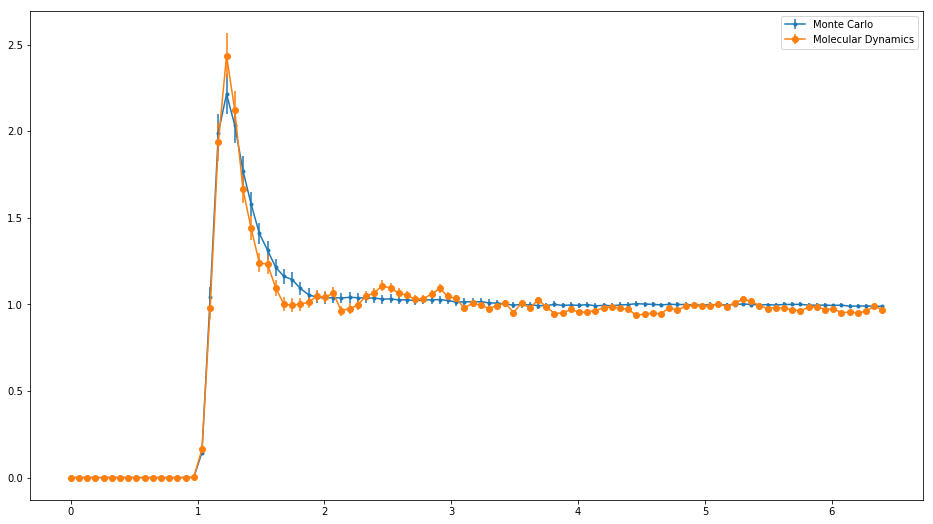

In [37]:
k=np.loadtxt("MonteCarlo_NVT/output.gave.0g")
x=k[:,0]
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo")

k=np.loadtxt("MolDyn/output.gave.0g")
x=k[:,0]
y=k[:,1]
err=k[:,2]

plt.errorbar(x,y,yerr=err, marker="o", label="Molecular Dynamics")
plt.legend()
plt.show()